In [3]:
import pandas as pd
import numpy as np
import datasets

aspects = [ 'actionability', 'grounding_specificity','verifiability', 'helpfulness']

data = datasets.load_dataset("boda/review_evaluation_human_annotation", name='combined_main_aspects', split = 'full')


full-00000-of-00001.parquet:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1430 [00:00<?, ? examples/s]

In [ ]:
data['actionability']

In [7]:

accepted_annotators =  {
    'boda' : "boda",
    '6740484e188a64793529ee77' : "Annotator1",
    '6686ebe474531e4a1975636f': "Annotator2"
 }
aspects_data = {

    "boda" : {},
    'Annotator1' : {},
    'Annotator2' : {}
}

for a in aspects_data:
    for aspect in aspects:
        aspects_data[a][aspect] = []

for row in data:
    for aspect in aspects:
        for annotator, score in zip(row[aspect]['annotators'], row[aspect]['labels']):
            aspects_data[accepted_annotators[annotator]][aspect].append(score)
    

Correlation matrix for boda:


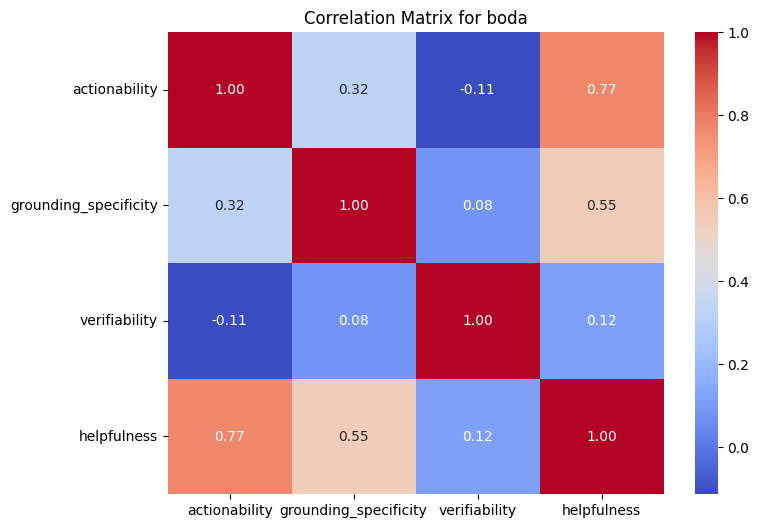

Correlation matrix for Annotator1:


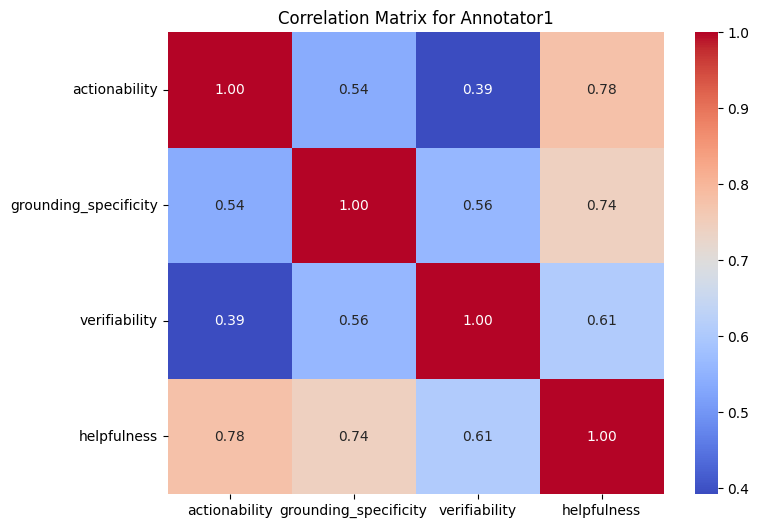

Correlation matrix for Annotator2:


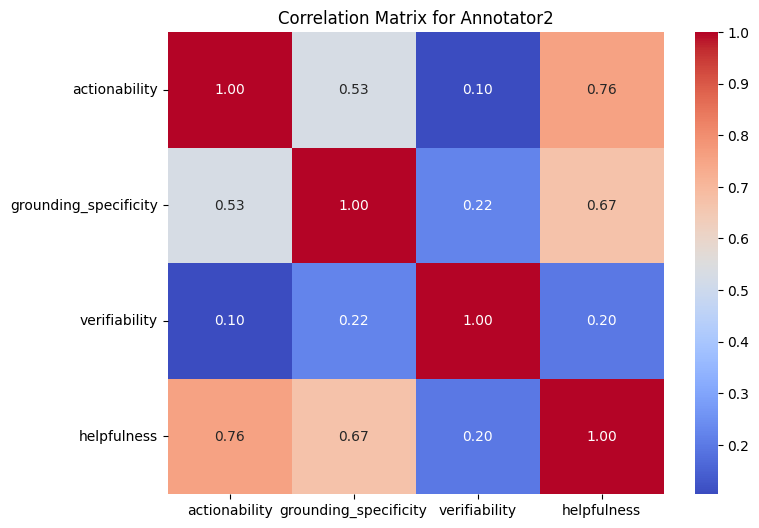

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Iterate through each annotator
for annotator_name, aspect_scores in aspects_data.items():
    print(f"Correlation matrix for {annotator_name}:")
    
    # Create a DataFrame for the annotator's scores
    df = pd.DataFrame(aspect_scores)
    
    # Replace 'X' with 0 in the 'verifiability' column
    df['verifiability'] = df['verifiability'].replace('X', 0).astype(int)
    
    # Compute the correlation matrix
    correlation_matrix = df.corr(method="pearson")
    
    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {annotator_name}")
    plt.show()